<h1><strong>Modeling</strong></h1>

<h3>Team Science Bros</h3>

In this notebook file you shall find Modeling script.

<h3> Normalizing and Modelling <h3>

In [35]:
# Define X (Feature) and Y (Target)

# X consist data from 'age' and 'avg_glucose_level' column (numeric)
X = df.iloc[:, [1, 7]].values

# Y consist data from 'stroke' column
y = df.iloc[:, 10].values

In [36]:
# Split dataset to traning and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [37]:
# Data normalization using scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Modelling
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_KNN = KNeighborsClassifier()
classifier_DT = DecisionTreeClassifier()
classifier_RF = RandomForestClassifier()

In [39]:
#K- Nearest Neighbors
from sklearn.model_selection import cross_val_score
classifier_KNN.fit(X_train, y_train)
KNN = classifier_KNN.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":KNN, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_KNN, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, KNN))
print('accuracy score :',accuracy_score(KNN,y_test))
print('Precision Score :',precision_score(KNN, y_test, average='weighted'))
print('recall score :',recall_score(KNN,y_test, average='weighted'))
print('f1_score :',f1_score(KNN, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, KNN))

[[1172    7]
 [  48    1]]
accuracy score : 0.9552117263843648
Precision Score : 0.9877197383333737
recall score : 0.9552117263843648
f1_score : 0.9709370637293132
K-Fold Validation Mean Accuracy: 0.95 


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1179
           1       0.12      0.02      0.04        49

    accuracy                           0.96      1228
   macro avg       0.54      0.51      0.51      1228
weighted avg       0.93      0.96      0.94      1228



In [40]:
#Decision Tree
classifier_DT.fit(X_train, y_train)
DT = classifier_DT.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":DT, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_DT, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, DT))
print('accuracy score :',accuracy_score(DT,y_test))
print('Precision Score :',precision_score(DT, y_test, average='weighted'))
print('recall score :',recall_score(DT,y_test, average='weighted'))
print('f1_score :',f1_score(DT, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, DT))


[[1126   53]
 [  45    4]]
accuracy score : 0.9201954397394136
Precision Score : 0.9145054462759484
recall score : 0.9201954397394136
f1_score : 0.9173197844487713
K-Fold Validation Mean Accuracy: 0.93 


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1179
           1       0.07      0.08      0.08        49

    accuracy                           0.92      1228
   macro avg       0.52      0.52      0.52      1228
weighted avg       0.93      0.92      0.92      1228



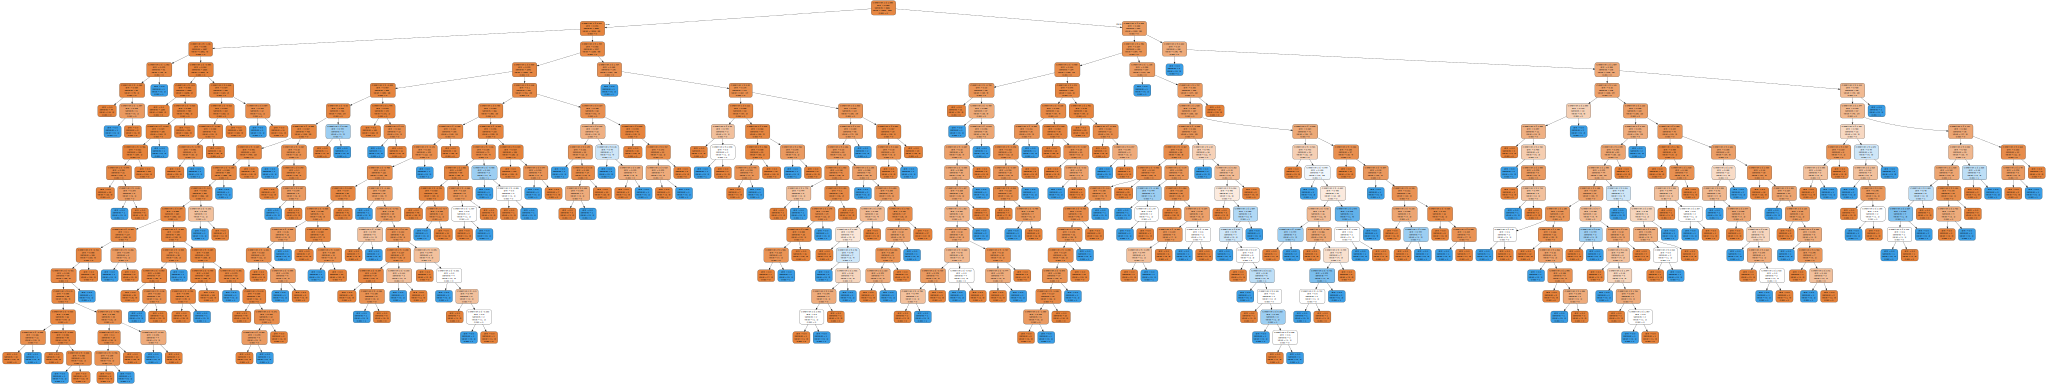

In [41]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_DT, out_file=None, feature_names=["Condition 1", "Condition 2"], class_names=["0", "1"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [42]:
#Random Forest 
classifier_RF.fit(X_train, y_train)
RF = classifier_RF.predict(X_test)
dataEvaluation=pd.DataFrame({"y_Prediksi":RF, "y_Actual":y_test})
accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10)
dataEvaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
print(confusion_matrix(y_test, RF))
print('accuracy score :',accuracy_score(RF,y_test))
print('Precision Score :',precision_score(RF, y_test, average='weighted'))
print('recall score :',recall_score(RF,y_test, average='weighted'))
print('f1_score :',f1_score(RF, y_test, average='weighted'))
print("K-Fold Validation Mean Accuracy: {:.2f} ".format(accuracies.mean()))
print('\n')
print(classification_report(y_test, RF))


[[1152   27]
 [  45    4]]
accuracy score : 0.9413680781758957
Precision Score : 0.9544938098570358
recall score : 0.9413680781758957
f1_score : 0.9477420787681372
K-Fold Validation Mean Accuracy: 0.95 


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1179
           1       0.13      0.08      0.10        49

    accuracy                           0.94      1228
   macro avg       0.55      0.53      0.53      1228
weighted avg       0.93      0.94      0.93      1228



<h3><strong>Results</strong></h3>

<strong>`Working with a dataset that didn't require a lot of effort in the preprocessing stage has proved to be fruitful. We have successfully implemented K-Nearest Neighbors, Decision Tree, and Random Forest algorithms. Each of these has an accuracy score of 95%, 92%, and 94% respectively.From our analysis, we have concluded that using the K-Nearest Neighbors algorithm for solving this problem is the best choice.`</strong>